<a href="https://www.kaggle.com/code/vijays140291/natural-language-processing?scriptVersionId=122055799" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Natural Language Processing

Natural Language Processing (NLP) is a subfield of Machine Learning (ML) that focuses on the interaction between computers and human language. NLP is concerned with the automatic processing of natural language data, including text, speech, and images.

NLP applications can be broadly categorized into two types: rule-based systems and machine learning systems. Rule-based systems use hand-coded rules and knowledge bases to analyze and generate natural language. Machine learning systems, on the other hand, learn from data to automatically identify patterns and make predictions.

There are several important techniques used in NLP, including text pre-processing, feature engineering, and model selection. Text pre-processing involves cleaning and formatting raw text data to prepare it for analysis. Feature engineering involves selecting and transforming relevant features from the text data to use as input for machine learning models. Model selection involves selecting an appropriate algorithm or model to make predictions based on the input features.

Some common applications of NLP in ML include sentiment analysis, named entity recognition, text classification, machine translation, and question-answering systems. NLP has many practical applications in fields such as customer service, marketing, and healthcare, and is an increasingly important area of research and development.

# Recurrent Neural Network(RNN)

TensorFlow is a popular open-source machine learning framework that provides a range of tools and libraries for building and training machine learning models. One of the key features of TensorFlow is its support for Recurrent Neural Networks (RNNs), which are a class of neural networks that are well-suited for processing sequential data.

RNNs have the ability to process sequences of inputs and maintain an internal state that allows them to capture temporal dependencies between the inputs. This makes them particularly useful for tasks such as natural language processing, speech recognition, and time-series forecasting.

In TensorFlow, RNNs can be built using the tf.keras.layers.SimpleRNN, tf.keras.layers.LSTM, or tf.keras.layers.GRU layers, depending on the specific requirements of the model. These layers can be stacked to create deep RNNs, which are capable of capturing more complex dependencies in the input data.

To train an RNN in TensorFlow, you first need to prepare the input data and define the model architecture using the appropriate RNN layer(s). You can then compile the model with an appropriate loss function and optimizer, and fit the model to the training data using the fit method.

After training the RNN, you can use it to make predictions on new data using the predict method. Alternatively, you can use the RNN as a feature extractor by extracting the output of one of the intermediate layers of the network, and using this as input to another model.

Overall, TensorFlow provides a powerful and flexible platform for building and training RNNs, and is widely used in both research and industry for a variety of NLP and time-series analysis tasks.





In [37]:
#importing the library
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv',encoding='latin-1',names=['Sentiment','Text'])
#loading the dataset
df

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


# Checking for Missing Values in the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<AxesSubplot:>

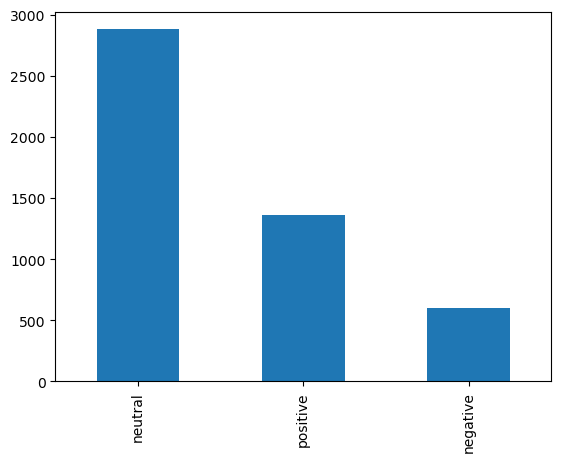

In [4]:
df['Sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sentiment'>

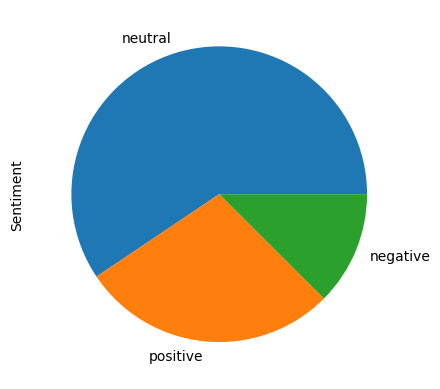

In [5]:
df['Sentiment'].value_counts().plot(kind='pie')

n Keras, a tokenizer is an object that is used to convert text into a sequence of numbers, which can be used as input for a neural network. The tokenizer works by first creating a dictionary of words in the input text and then assigning a unique integer index to each word. The tokenizer can then convert the text into a sequence of integers by replacing each word in the text with its corresponding integer index.

Here is an example of how to use the tokenizer in Keras:

python
Copy code
from keras.preprocessing.text import Tokenizer

# Define some text
text = ['This is an example sentence.', 'Another sentence for the tokenizer.']

# Create a tokenizer object
tokenizer = Tokenizer()

# Fit the tokenizer on the text
tokenizer.fit_on_texts(text)

# Convert the text to a sequence of integers
sequences = tokenizer.texts_to_sequences(text)

# Print the sequences
print(sequences)
In this example, the Tokenizer object is created and fitted on the input text using the fit_on_texts() method. The text_to_sequences() method is then used to convert the input text into a sequence of integers. The output of this code will be a list of sequences, where each sequence corresponds to a sentence in the input text, with each word replaced by its corresponding integer index.





# Preprocessing Function

In [6]:
def get_sequences(text):
    #creating a tokenizer object
    tokenizer=Tokenizer()
    #using fit_on_text method to convert word into number most frequent would assign to 1 and with lower frequency assign to lower number
    tokenizer.fit_on_texts(text)
    #getting the word and the number assigning to them
    sequences=tokenizer.texts_to_sequences(text)
    
    
    #getting maximum length of list inthe sequences list 
    
    print('Maximum Vocab',len(tokenizer.word_index))
    max_sequence_length=np.max(list(map(lambda x:len(x),sequences)))
    
    print('Max Sequences Length',max_sequence_length)
    
    sequences=pad_sequences(sequences,maxlen=max_sequence_length,padding='post')
    
    
    
    return sequences

In [7]:
get_sequences(df['Text'])

Maximum Vocab 10122
Max Sequences Length 71


array([[  94,    5, 3498, ...,    0,    0,    0],
       [ 840,  336,    5, ...,    0,    0,    0],
       [   1,  293,  656, ...,    0,    0,    0],
       ...,
       [  42,   31,  242, ...,    0,    0,    0],
       [  30,   27,    2, ...,    0,    0,    0],
       [  27,    3,   35, ...,    0,    0,    0]], dtype=int32)

In [8]:
def preprocess_inputs(df):
    df=df.copy()
    sequences=get_sequences(df['Text'])
    df['Sentiment']=df['Sentiment'].replace({'negative':0,'positive':1,'neutral':2})
    y=df['Sentiment']

    x_train,x_test,y_train,y_test=train_test_split(sequences,y,train_size=0.7,random_state=1)
    return x_train,x_test,y_train,y_test

In [9]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
x_train

Maximum Vocab 10122
Max Sequences Length 71


array([[5442,  510,   16, ...,    0,    0,    0],
       [  22, 1628,    4, ...,    0,    0,    0],
       [1141,  936,  136, ...,    0,    0,    0],
       ...,
       [   1,  419,   16, ...,    0,    0,    0],
       [2586,  123, 3247, ...,    0,    0,    0],
       [  30,  615,  555, ...,    0,    0,    0]], dtype=int32)

In [10]:
x_train.shape


(3392, 71)

In [11]:
y_train

545     1
2374    0
4217    2
1071    2
716     1
       ..
2895    2
2763    2
905     1
3980    2
235     1
Name: Sentiment, Length: 3392, dtype: int64

# Constructing the Neural Network

In [12]:
inputs=tf.keras.Input(shape=(71,))
x=tf.keras.layers.Embedding(
input_dim=10123,
output_dim=128,
input_length=71)(inputs)
x=tf.keras.layers.GRU(256,activation='tanh')(x)
outputs=tf.keras.layers.Dense(3,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_split=0.2,
                 batch_size=32,epochs=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=3,
                 restore_best_weights=True)])

Epoch 1/100
85/85 [==============================] - 20s 144ms/step - loss: 0.9273 - accuracy: 0.6052 - val_loss: 0.9621 - val_accuracy: 0.5700
Epoch 2/100
85/85 [==============================] - 5s 63ms/step - loss: 0.9165 - accuracy: 0.6052 - val_loss: 0.9621 - val_accuracy: 0.5700
Epoch 3/100
85/85 [==============================] - 4s 49ms/step - loss: 0.9177 - accuracy: 0.6052 - val_loss: 0.9628 - val_accuracy: 0.5700
Epoch 4/100
85/85 [==============================] - 4s 48ms/step - loss: 0.9159 - accuracy: 0.6052 - val_loss: 0.9716 - val_accuracy: 0.5700
Epoch 5/100
85/85 [==============================] - 2s 21ms/step - loss: 0.9153 - accuracy: 0.6052 - val_loss: 0.9772 - val_accuracy: 0.5700


In [13]:
model.evaluate(x_test,y_test)

46/46 [==============================] - 0s 5ms/step - loss: 0.9359 - accuracy: 0.5846


[0.9359003901481628, 0.5845942497253418]

In [23]:
x_test

array([[   1, 1967,  159, ...,    0,    0,    0],
       [ 554,   16, 6822, ...,    0,    0,    0],
       [  42,   31,  242, ...,    0,    0,    0],
       ...,
       [  94,    5, 2084, ...,    0,    0,    0],
       [   1,  259,  184, ...,    0,    0,    0],
       [ 618,   12,  538, ...,    0,    0,    0]], dtype=int32)

In [26]:
model.predict(x_test)

46/46 [==============================] - 0s 6ms/step


array([[0.11978002, 0.2688071 , 0.6114129 ],
       [0.11978002, 0.2688071 , 0.6114129 ],
       [0.11978003, 0.2688071 , 0.6114128 ],
       ...,
       [0.11978002, 0.2688071 , 0.6114129 ],
       [0.11978002, 0.26880708, 0.6114129 ],
       [0.11978002, 0.26880708, 0.6114129 ]], dtype=float32)

In [33]:
y_pred=np.argmax(model.predict(x_test),axis=1)

46/46 [==============================] - 0s 4ms/step


In [21]:
from sklearn.metrics import confusion_matrix

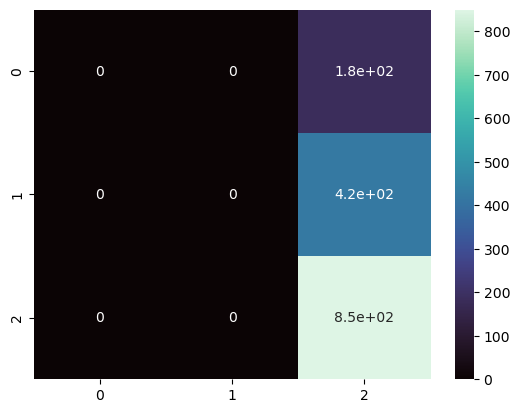

In [38]:
cm=confusion_matrix(np.array(y_test),y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()